In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [49]:
df = pd.read_csv(r'MovingOccluded.csv')
east = df['.UTM_easting']
north = df['.UTM_northing']
print(rsme(east))
print(rsme(north))
print(error_bounds('.UTM_easting'))
print(error_bounds('.UTM_northing'))
df[".UTM_easting"] = ((df[".UTM_easting"] - 327900)) - 60
df[".UTM_northing"] = ((df[".UTM_northing"] - 4689400))-90
print (df)

8.078792005768367
4.820624269652221
upper bound : 14.499665470328182
mean: 327966.62527387333
lower bound : 9.553062389895786
None
upper bound : 9.14418619684875
mean: 4689499.440575756
lower bound : 9.746029518544674
None
                           time  .Header.seq  .Header.stamp.secs  \
0    2022/10/06/20:03:10.087948            0                 190   
1    2022/10/06/20:03:11.088646            0                 191   
2    2022/10/06/20:03:12.082501            0                 192   
3    2022/10/06/20:03:13.088635            0                 193   
4    2022/10/06/20:03:14.085226            0                 194   
..                          ...          ...                 ...   
121  2022/10/06/20:05:11.098237            0                 311   
122  2022/10/06/20:05:12.100284            0                 312   
123  2022/10/06/20:05:13.095988            0                 313   
124  2022/10/06/20:05:14.097793            0                 314   
125  2022/10/06/20:05:15.0990

In [50]:
east = df['.UTM_easting']
north = df['.UTM_northing']
alt = df['.Altitude']
time = df['.Header.stamp.secs']
mean1 = np.mean(df['.UTM_easting'])
mean2 = np.mean(df['.UTM_northing'])
print(mean1)
print(mean2)

6.6252738733730645
9.440575757766114


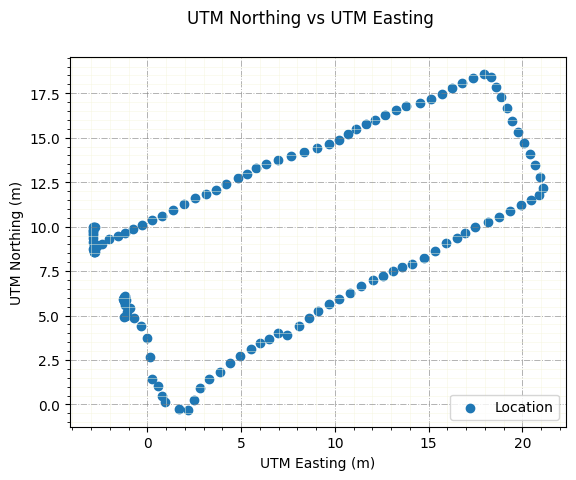

In [51]:
fig = plt.figure()
ax = plt.axes()
fig.suptitle('UTM Northing vs UTM Easting', fontsize=12)
circle2 = plt.Circle((5, 5), 0.5, color='b', fill=False)
one = ax.scatter(east, north, label='Location')
#two = ax.scatter(mean1,mean2, label='Mean')
plt.legend(handles=[one], loc='lower right')
plt.xlabel('UTM Easting (m)', fontsize=10)
plt.ylabel('UTM Northing (m)', fontsize=10)
#major grid lines
plt.grid(visible=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=0.7)
#minor grid lines
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='beige', alpha=0.8, ls='-', lw=0.4)
plt.show()

In [52]:
px.scatter(df, x='.UTM_easting', y='.UTM_northing' ,opacity=0.7)

In [53]:
px.scatter_3d(df, x='.UTM_easting', y='.UTM_northing', z='.Altitude', size_max=18, opacity=0.4)

In [54]:
def rsme (column_name):
 column = np.mean(column_name)
 column_rsme = np.sqrt(np.square(column_name - column).mean())
 return column_rsme

In [55]:
def error_bounds (column_name):
 column=df[column_name].tolist()
 mean = np.mean(column) 
 u = max(column) - np.mean(column)
 l = np.mean(column)  - min(column)
 print(f'upper bound : {u}')
 print(f'mean: {mean}')
 print(f'lower bound : {l}')

In [56]:
print(rsme(east))
print(rsme(north))
print(error_bounds('.UTM_easting'))
print(error_bounds('.UTM_northing'))

8.078792005768367
4.820624269652221
upper bound : 14.499665470286143
mean: 6.6252738733730645
lower bound : 9.553062389937825
None
upper bound : 9.144186195215239
mean: 9.440575757766114
lower bound : 9.746029520178185
None
